In [11]:
import pandas as pd

Тест и попытка разобратся

In [12]:
train = pd.read_excel("train.xlsx")
train

,dt,Цена на арматуру
0,2015-01-05,32900
1,2015-01-12,32500
2,2015-01-19,32000
3,2015-01-26,30700
4,2015-02-02,30300
...,...,...
395,2022-08-01,47500
396,2022-08-08,49000
397,2022-08-15,47500
398,2022-08-22,46500


In [13]:
test = pd.read_excel("test.xlsx")
test

,dt,Цена на арматуру
0,2022-09-05,46000
1,2022-09-12,46000
2,2022-09-19,46000
3,2022-09-26,45500
4,2022-10-03,45500
5,2022-10-10,45000
6,2022-10-17,44000
7,2022-10-24,43000
8,2022-10-31,42000
9,2022-11-07,41500


что-то както мало

In [14]:
# ch = pd.read_excel("Ch.xlsx")
# ch

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   dt                400 non-null    datetime64[ns]
 1   Цена на арматуру  400 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 6.4 KB


In [16]:
train.describe()

,dt,Цена на арматуру
count,400,400.000000
mean,2018-11-01 12:00:00,39229.475000
min,2015-01-05 00:00:00,21000.000000
25%,2016-12-03 06:00:00,31075.000000
50%,2018-11-01 12:00:00,35450.000000
75%,2020-09-29 18:00:00,42000.000000
max,2022-08-29 00:00:00,79000.000000
std,NaN,13407.979668


In [17]:
train

,dt,Цена на арматуру
0,2015-01-05,32900
1,2015-01-12,32500
2,2015-01-19,32000
3,2015-01-26,30700
4,2015-02-02,30300
...,...,...
395,2022-08-01,47500
396,2022-08-08,49000
397,2022-08-15,47500
398,2022-08-22,46500


In [18]:
import matplotlib.pyplot as plt

<Axes: title={'center': 'Time series'}, xlabel='Date', ylabel='prise'>

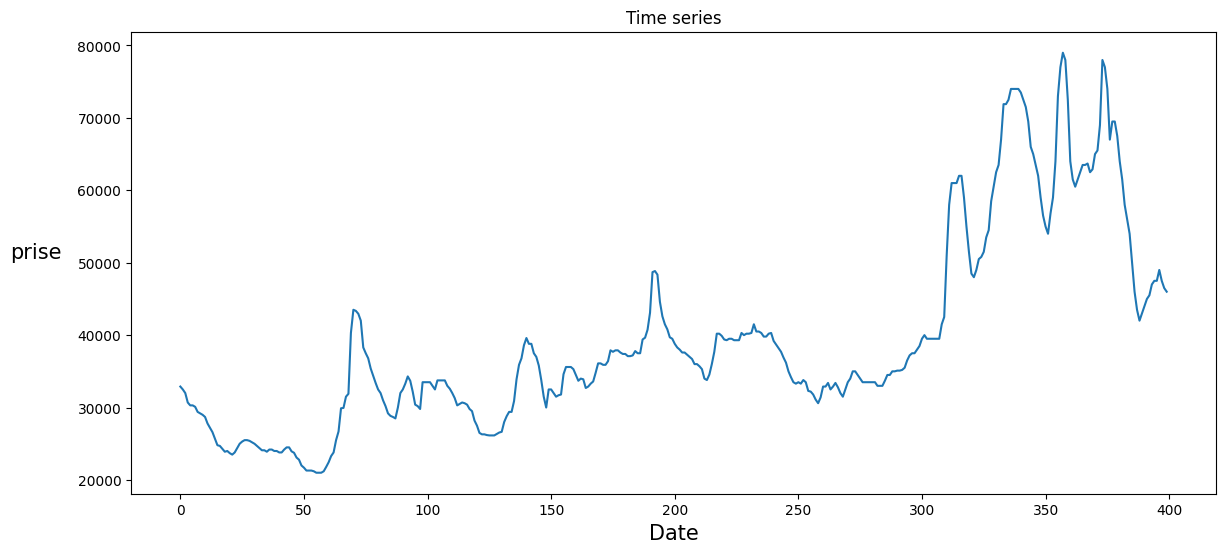

In [19]:
plt.figure(figsize=(14, 6))
plt.title('Time series')
plt.xlabel('Date', fontsize=15)
plt.ylabel('prise', rotation=0, labelpad=30, fontsize=15)
train['Цена на арматуру'].plot()

<Axes: title={'center': 'Residual'}>

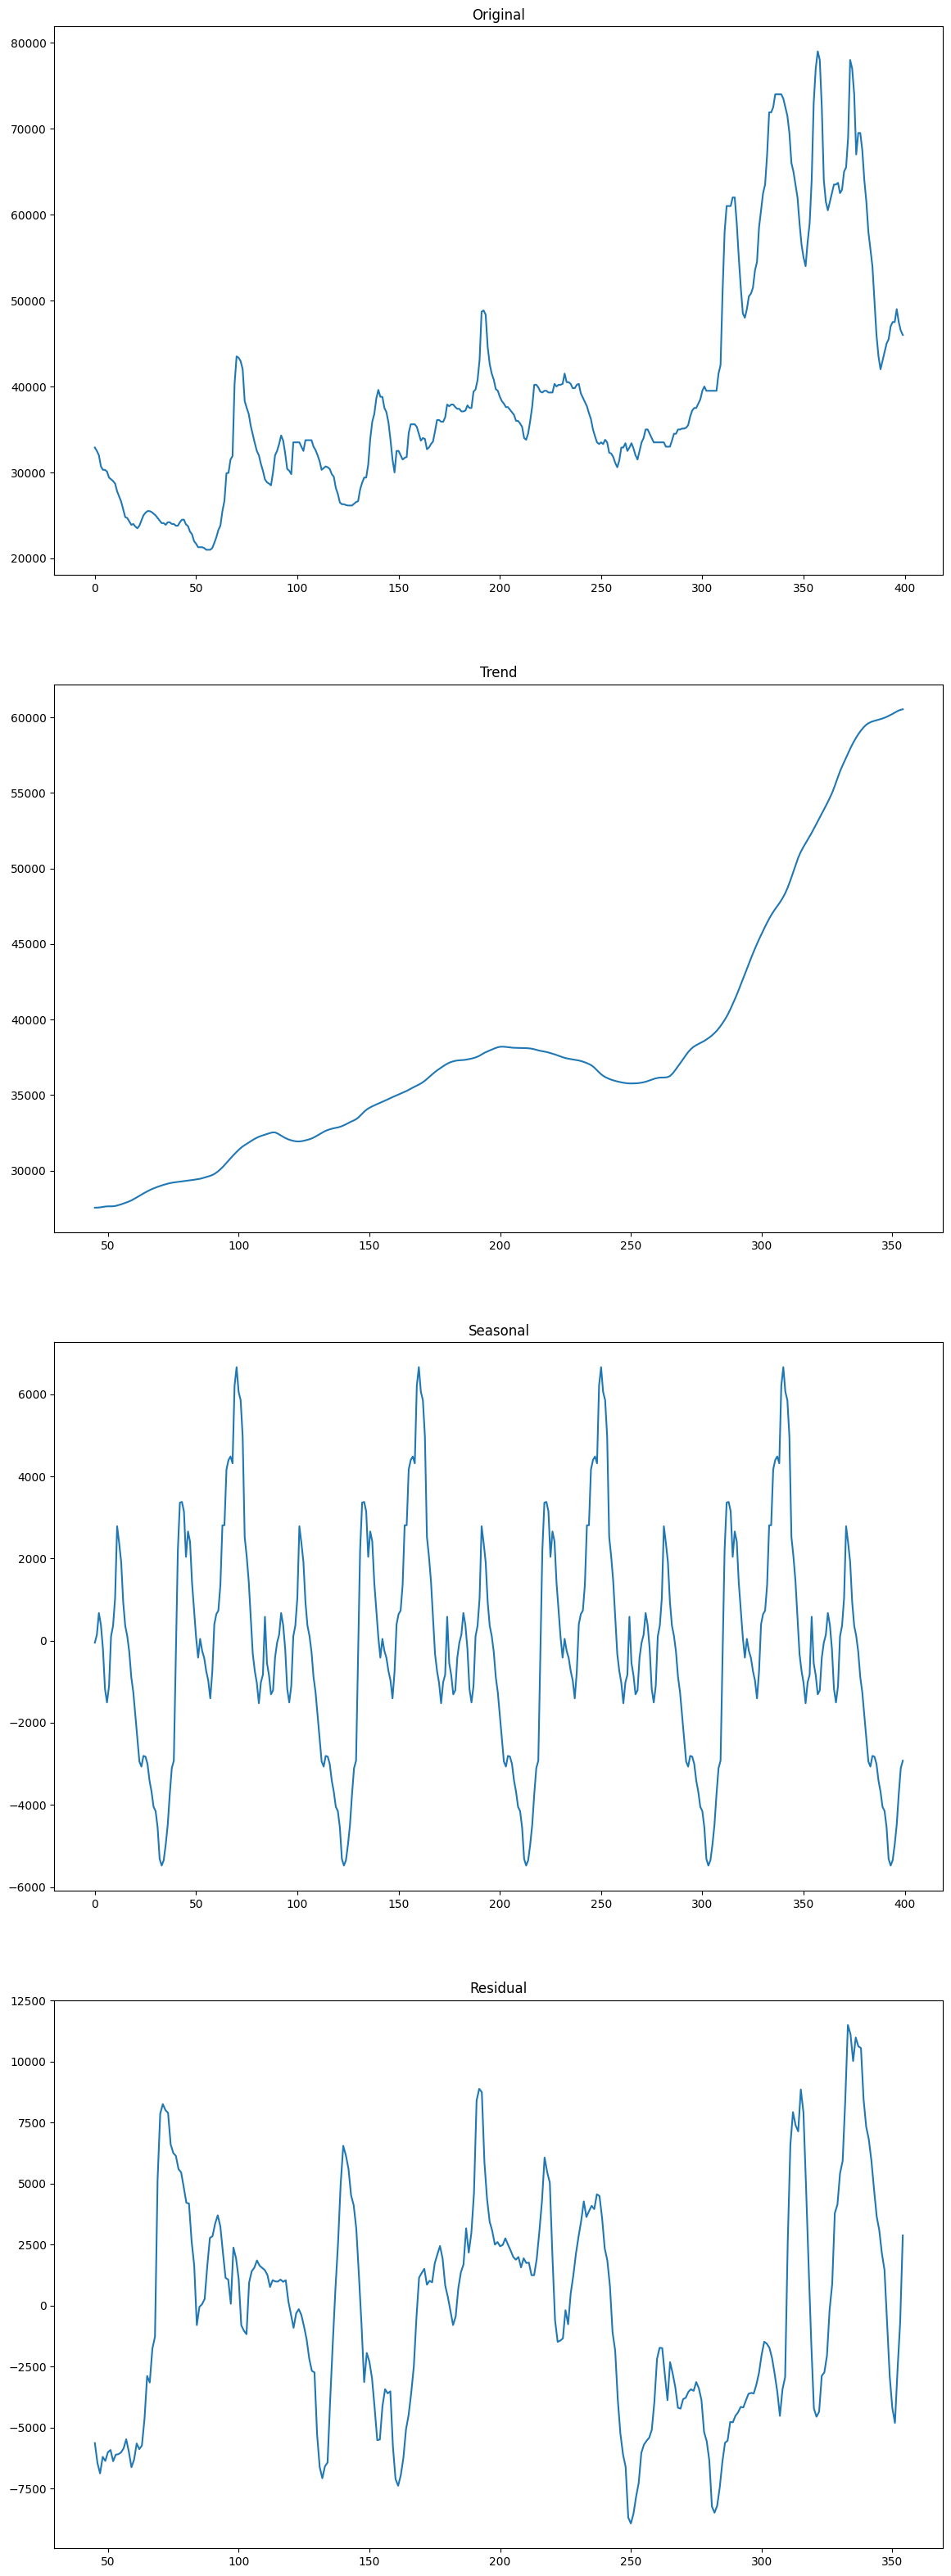

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(14, 40))
decompose = seasonal_decompose(train[['Цена на арматуру']], period=90)

ax[0].set_title('Original')
ax[1].set_title('Trend')
ax[2].set_title('Seasonal')
ax[3].set_title('Residual')

decompose.observed.plot(ax=ax[0])
decompose.trend.plot(ax=ax[1])
decompose.seasonal.plot(ax=ax[2])
decompose.resid.plot(ax=ax[3])

In [21]:
df_train = train["Цена на арматуру"].iloc[:400]
df_test = test["Цена на арматуру"].iloc[:27]
print(f"Длина df_test: {len(df_test)}")

Длина df_test: 27


In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.tsa.ar_model import AutoReg

In [23]:

model = AutoReg(df_train, lags=19).fit()
forecasts = model.forecast(steps=27).tolist()
test_values = df_test.tolist()

print(r2_score(test_values, forecasts))

-0.1155579038754837


In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(df_test, forecasts)
mse = mean_squared_error(df_test, forecasts)
rmse = mse**0.5

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

MAE: 2320.138514320391
MSE: 9406218.977640467
RMSE: 3066.955979084223


In [25]:
print(df_train.head())  # Проверка первых строк обучающих данных
print(df_test.head())   # Проверка первых строк тестовых данных
print(df_train.isnull().sum())  # Проверка на пропуски
print(df_test.isnull().sum())

0    32900
1    32500
2    32000
3    30700
4    30300
Name: Цена на арматуру, dtype: int64
0    46000
1    46000
2    46000
3    45500
4    45500
Name: Цена на арматуру, dtype: int64
0
0


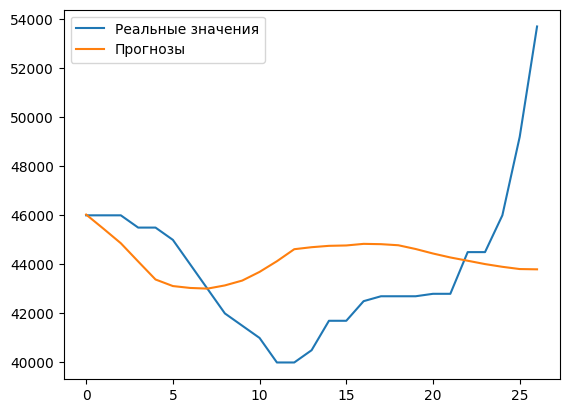

In [26]:
import matplotlib.pyplot as plt

plt.plot(df_test.index, df_test, label="Реальные значения")
plt.plot(df_test.index, forecasts, label="Прогнозы")
plt.legend()
plt.show()

вахвваххв все плохо

сделано для того чтобы просто посмотреть этапы и попытатся разобратся со всеми
